In [1]:
import pandas as pd
import numpy as np

# Introduction to Statistics and Indicators in Finance

Most fields in finance rely on some sort of data analysis given their respective objective. For example in fundamental analysis of a business, various numbers from the company itself (i.e. from the balance sheet) and such indicators representing the overall market are used in order to price the company's stock. The results from such analyses are utilised in making decisions regarding for example an investement in said company. There are many well established techniques and statistics for pricing financial products. Yet, the search for indicators or ways in generel to foresee an investement's future performance is ever ongoing. Especially since the dawn of more powerful algorithms and artificial intelligence being more readily available for the public. 

In this chapter, we will take a look at statistics, that are the very basis of such analyses and examine some examples that would lead the way to more sophisticated procedures.  

## Returns

In order for an investment to be profitable, the money it yields must be higher than the inital investment made (plus some transaction costs which is the amount paid to make the investment, e.g. the money you'd pay a bank so that they buy some stocks for you). If we want to assess how much the value of an investment increased (or decreased), we look at the so called return. The usual, i.e. discrete, return is defined as the relative change in value $S$. In mathematical terms, we look at the ratio of the past and the present value and subtract one:

$$ r_t = \frac{S_t - S_{t-1}}{S_{t-1}} =\frac{S_t}{S_{t-1}} - 1 $$ 

Note here that one time step $t$ is of arbitrary length. Two examples: daily returns imply that the price of two successive days are used. Monthly returns would be calculated by using prices that are separated by the time span of one month.


### Additivity

One may be confronted with returns based on different time spans, that need to be taken into account or that somehow need to be compared to each other. This could require a means of aggregating these returns in order to bring them to the same time scale. The property we are looking for is called addititvity, i.e. the sum of the shorter-scale returns should be equal to the larger-scale return. Working with the example above, we could face the need to aggregate the daily returns to get monthly returns. We thus wish to be able to add all daily returns of one month in order to get the monthly return. Note while this is possible, as explained in the following, we can't just split monthly returns into daily returns without making assumptions on the distribution of these artificial daily returns.  
We'll now choose a slightly different example of daily and weekly returns (in this example, we assume seven trading days). To calculate weekly returns from daily returns, we mustn't use the daily return as is.  
Let's consider the following values:


time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
prices $S_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
return $r_t$ |  --- | 0.10 |  0.10 |  -0.09 |  0.2  |  -0.20 |  0.07 | -0.06

If we simply added all returns, we'd find a weekly return of $r_{0,7} = 0.12$. However, using the correct formula from above, we find that

$$ r_{0,7} = \frac{S_7}{S_{0}} - 1 = \frac{105}{100} - 1  = 0.05 $$

and conclude that indeed daily returns cannot simply be added up in order to yield the weekly return.

#### log-returns

With a single transformation however, we can can establish the desired additivity over time. The transformation needed is taking the logarithm. There are basically two ways of seeing the calculation of these so called log returns, which are equivalent. Either logarithmise the (daily) **prices** and simply get the difference between sucessive values. Or logarithmise the ratio of the past and current price:  

$$ r_t^{log} = \log{\frac{S_t}{S_{t-1}}} $$  

$$ \downarrow(\log{\frac{x}{y}} = \log{x}- \log{y})$$  

$$ = \log{S_t} - \log{S_{t-1}} $$  

These log returns, or continuous returns, now exhibit the qualities the discrete returns from the example above lacked.  
Let's have a look at the same table after taking the logarithm and try the same aggregation from above.

time $t$       |  0   |   1  |   2   |   3    |   4   |   5   |   6   |   7   
-------------|------|------|-------|--------|-------|-------|-------|----------
prices $S_t$  |  100 |  110 |  121  |  110   |  132  |  105  |  112  |   105  
log return $r_t^{log}$ |  --- | 0.10 |  0.10 |  -0.10 |  0.18  |  -0.23 |  0.06 | -0.06

Now, we add all log returns up and find the weekly log return to be $ r_{0,7} = 0.05 $. 
To convert log returns to discrete returns, we simply take the exponent (the inverse of the logarithm) of the log return **and subtract 1**, which will also result in a value of $0.05$.  

Having a look at the math with logarithmised prices, we can unveil the characteristics of this additive behaviour:  

$$ r_{t=2}^{log} =\log{\frac{S_t}{S_{t-1}}} = \log{S_{t=2} - \log{S_{t=0}}} $$  

$$\downarrow \text{"add zero": } - \log{S_{t=1}} + \log{S_{t=1}} = 0 $$  

$$ r_{0, t=2}^{log} =\log{S_{t=2} + 0 - \log{S_{t=0}}} $$

$$ r_{0, t=2}^{log} = (\log{S_{t=2} - \log{S_{t=1}}) + (\log{S_{t=1}} - \log{S_{t=0}}}) $$

$$ r_{0, t=2}^{log} = r_{1, t=2}^{log} + r_{0, t=1}^{log} $$


One may notice that the log returns are very close to the discrete returns. This is due to the fact, the logarithm behaves almost linear for values close to zero. So for small values of the discrete return, the log returns are very similar. Note that this applies almost always for daily returns and even shorter time spans. For a monthly return (or quarterly, yearly) there "is more time for the value to develop" and we usually find higher returns for larger time spans.  

Let's have a look at how we can calculate returns in python using the prices from the table above.

In [2]:
df = pd.DataFrame({
    'S': [100, 110, 121, 110, 132, 105, 112, 105],
    },
index=list(range(8)))
df

,S
0,100
1,110
2,121
3,110
4,132
5,105
6,112
7,105


We can calculate discrete returns simply by using a method of a Series object: `.pct_change()`.  
Note the `NaN` value for the first line.

In [3]:
df['discrete_returns'] = df.S.pct_change()
df

,S,discrete_returns
0,100,NaN
1,110,0.100000
2,121,0.100000
3,110,-0.090909
4,132,0.200000
5,105,-0.204545
6,112,0.066667
7,105,-0.062500


To calculate log returns with numpy's `np.log()`, we can either utilise the prices, logarithmise them and calculate the difference using `.diff()` or use the discrete returns by adding one before taking the logarithm.
For completeness, we also add a column with discrete returns calculated from the log returns.

In [4]:
# use prices and 
df['log_returns'] = np.log(df.S).diff()
df['log_returns_alt'] = np.log(df.discrete_returns.dropna()+1)
df['discrete_returns_from_log'] = np.exp(df.log_returns) - 1
df

,S,discrete_returns,log_returns,log_returns_alt,discrete_returns_from_log
0,100,NaN,NaN,NaN,NaN
1,110,0.100000,0.095310,0.095310,0.100000
2,121,0.100000,0.095310,0.095310,0.100000
3,110,-0.090909,-0.095310,-0.095310,-0.090909
4,132,0.200000,0.182322,0.182322,0.200000
5,105,-0.204545,-0.228842,-0.228842,-0.204545
6,112,0.066667,0.064539,0.064539,0.066667
7,105,-0.062500,-0.064539,-0.064539,-0.062500


### Characteristics of returns 

Usually, returns exhibit the following:
- expected returns are close to zero (the shorter the time span, the smaller the expected return)
- weakly stationary (i.e. constant expected value and variance over time) **but** usually volatility clustering
- skewed distribution

From these items alone, we can start an analysis of stock returns by looking at some (standardized) moments of the empirical data:
- the average return as an estimate of the expected return
- the empirical variance or standard deviation/volatility 
- skewness (if negative: left skewed)
- (excess) kurtosis (larger $\rightarrow$ fat tails)

The average return can be seen as an indicator on how profitable a long term investment may be. The volatility is interpreted as a risk measure, i.e. the higher the volatility, the higher the risk. Skewness, especially left-skewdness, can indicate a higher probability of being exposed to larger losses. Finally, kurtosis means how "fat tailed" a distribution is and thus how exposed the investment would be to extreme values, both positive and negative. If we talk about excess kurtosis, we subtract a value of 3. this reference value is the kurtosis of a standard normal distribution.

In pandas, we can take a look at these moments by calling the appropriate methods. We will have a look at real-world data, downloading close prices using the yfinance package and calculating the returns. 

In [5]:
import yfinance as yf

msft = yf.Ticker('MSFT').history(start="2020-01-01")

In [6]:
msft = msft[['Close']]
msft['daily_return'] = msft['Close'].pct_change()
msft.dropna(inplace=True)

In [7]:
avg_return = msft.daily_return.mean()
vola = msft.daily_return.std()
skew = msft.daily_return.skew()
kurtis = msft.daily_return.kurt()


print(f'average return {np.round(avg_return,4)}')
print(f'volatility {np.round(vola, 4)}')
print(f'skewness {np.round(skew, 4)}')
print(f'kurtosis {np.round(kurtis, 4)}')

average return 0.0012
volatility 0.0204
skewness 0.0146
kurtosis 6.6034


As we discussed before, it is always recommended to take a look at some charts.  
We can plot returns over time as well as look at the distribution.

<AxesSubplot: xlabel='Date'>

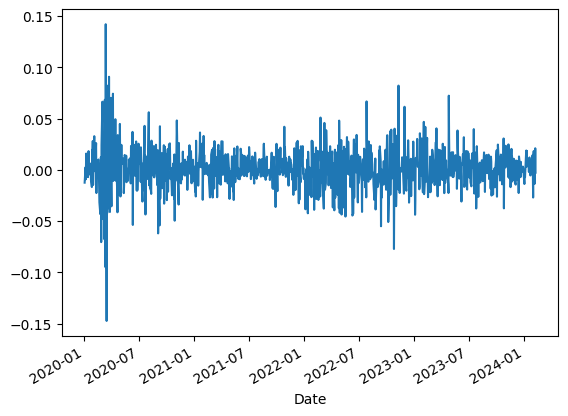

In [8]:
msft.daily_return.plot()

Over time, we see that the volatility is far from constant, something that is often knowingly ignored/downplayed. Even though it is found  in almost every time series of returns given a sufficiently long observation period.

To look at the distribution, we already know which plot to utilise.

<AxesSubplot: xlabel='daily_return', ylabel='Count'>

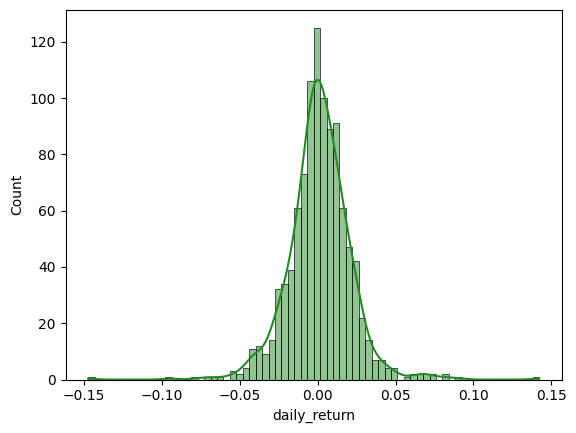

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(msft.daily_return, color='forestgreen', kde = True)

From the kernel density estimation (solid line), we can in fact see the left-skewedness of the distribution, meaning we find more negative returns of larger absolute values.

# The CAPM factor-model and excess returns 


The Captial Asset Pricing Model in its most simple form (Sharpe, Lintner) quantifies an assets risk with regard to non-diversifiable market risk. Risk can usually be attributed to two sources: idiosyncratic and systematic (market) risk. The former can be eliminated by constructing a diversified portfolio, the latter remains. In order to quantify how much an asset is subject to market risk, a ordinary least squares (OLS) model is used. The simplest case is a model with the asset returns as endogenous/dependent variable and the market return as exogenous/independent. The model equation for is as follows

$$ r_{i,t} - r_{i,f} = \alpha + \beta \cdot (r_{M,t} - r_{i,f}) + \epsilon_{i,t}$$

Where $\alpha$ and $\beta$ are the regression coefficients, $r_{i,t}$ is the return of asset i at time t, $r_{M,t}$ is the market return at time t, $r_{i,f}$ the risk-free rate at time t and $\epsilon_{i,t}$ the residuals.
If we assume a risk-free rate of $r_{f,t}=0$, this becomes 

$$ r_{i,t} = \alpha_i + \beta_i \cdot r_{M,t} + \epsilon_{i,t}$$

After $\alpha_i$ and $\beta_i$ are estimated using OLS, what do they tell us? Usually, in order to check whether the model is appropiate, $\alpha_i$ should not be statistically significant, i.e. the estimated p-value should be larger than usually 5%.

Assuming it is, $\beta_i$ tells us about the sensitivity of the asset with regard to market risk:
- for $\beta=1$ an asset's expected return is assumed to match the expected market return
- for $\beta >1$ an asset is more volatile than the market and thus considered more risky than the market
- for $\beta <1$ an asset is less volatile than the market and considered less risky than the market

When we talk about this kind of risk sensitivity, we must keep the following in mind. We can never really know the market return which we use as a benchmark (as we use its returns in the model). So we need to use a proxy for the whole market, for example an index that includes the largest companies like the S&P 500.

Estimating $\beta_i$ using OLS, we get the residuals $\epsilon_{i,t}$ in the same process. These represent the idiosyncratic part of the returns, i.e. the part of the variation which is not explained by market movement. Having the time-series of asset returns $r_i$ and $\epsilon_{i,t}$, we can calculate the idosyncratic part of the stocks volatility as the standard deviation of the residuals: 

$$\sigma(\epsilon_{i,t})$$ 

Now, we can also calculate the systematic part of the returns volatility as 

$$ \rho_i = \frac{\sigma(r_{i,t}) - \sigma(\epsilon_{i,t})}{\sigma(r_{i,t})} $$